# 1. Truth Table for XOR

In [40]:
import numpy as np

# XOR gate truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([0, 1, 1, 0])  # XOR outputs

# Display the XOR truth table
for i in range(4):
    print(f"Input: {X[i]} => XOR Output: {y[i]}")


Input: [0 0] => XOR Output: 0
Input: [0 1] => XOR Output: 1
Input: [1 0] => XOR Output: 1
Input: [1 1] => XOR Output: 0


# 2. Implement the Perceptron Model Using MCP (McCulloch-Pitts) Neuron
In a Single Layer Perceptron, the model attempts to classify inputs based on linear decision boundaries. For XOR, it will fail because XOR is not linearly separable.

In [41]:
class MCPNeuron:
    def __init__(self, learning_rate=0.1):
        # Initialize weights randomly
        self.weights = np.random.rand(2)
        self.bias = np.random.rand(1)
        self.lr = learning_rate  # Learning rate

    def activation(self, x):
        # Step activation function (threshold)
        return 1 if x > 0 else 0

    def predict(self, inputs):
        # Summation of weighted inputs
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation(summation)

    def train(self, training_inputs, labels, epochs=10):
        # Training the perceptron
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights and bias using the error
                self.weights += self.lr * error * inputs
                self.bias += self.lr * error

# Instantiate the perceptron
perceptron = MCPNeuron()

# Train the perceptron using XOR data
perceptron.train(X, y, epochs=10)

# Test the perceptron
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs} => Predicted: {prediction}")


Input: [0 0] => Predicted: 1
Input: [0 1] => Predicted: 1
Input: [1 0] => Predicted: 0
Input: [1 1] => Predicted: 0


# Interpretation:
In this step, we implement the perceptron model using McCulloch-Pitts neurons. The model tries to adjust weights and biases using a simple learning rule based on the XOR truth table. However, since XOR is not linearly separable, the perceptron will fail to classify XOR accurately.

Expected Outcome:
The perceptron will give incorrect predictions for XOR (it cannot classify XOR correctly).

# 3. Observe and Discuss the Perceptron's Performance
After running the perceptron, you will observe the results, and the perceptron will fail to classify XOR correctly. This is because a single-layer perceptron can only learn linearly separable functions (like AND and OR), but XOR is not linearly separable.

Interpretation:
The perceptron will classify inputs like [0, 0] and [1, 1] correctly but fail for [0, 1] and [1, 0].
This is because XOR requires a non-linear decision boundary, something a single-layer perceptron cannot handle.

# 4. Implement XOR Using Multi-Layer Perceptron (MLP)
To correctly classify XOR, we need to use a Multi-Layer Perceptron (MLP). An MLP can learn non-linear decision boundaries, which are necessary for XOR classification.

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR Dataset for PyTorch
X_tensor = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input as tensor
y_tensor = torch.Tensor([[0], [1], [1], [0]])  # XOR output as tensor

# Define the Multi-Layer Perceptron model
class MLP_XOR(nn.Module):
    def __init__(self):
        super(MLP_XOR, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input layer to hidden layer with 2 neurons
        self.fc2 = nn.Linear(2, 1)  # Hidden layer to output layer
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation function

    def forward(self, x):
        # Forward pass: input -> hidden layer -> output
        x = torch.sigmoid(self.fc1(x))  # Sigmoid in hidden layer
        x = torch.sigmoid(self.fc2(x))  # Sigmoid in output layer
        return x

# Instantiate the MLP model
mlp_model = MLP_XOR()

# Define the loss function (Binary Cross-Entropy) and optimizer (Stochastic Gradient Descent)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(mlp_model.parameters(), lr=0.1)

# Train the MLP model
epochs = 10000  # Number of training epochs
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = mlp_model(X_tensor)  # Forward pass
    loss = criterion(outputs, y_tensor)  # Compute the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights
    
    # Print loss every 1000 epochs for tracking
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Test the trained MLP model
with torch.no_grad():  # No need to compute gradients during testing
    for i in range(4):
        input_data = X_tensor[i]
        output = mlp_model(input_data)
        print(f"Input: {input_data.numpy()} => Predicted: {output.item():.4f}")


Epoch 0, Loss: 0.6964015364646912
Epoch 1000, Loss: 0.6929045915603638
Epoch 2000, Loss: 0.6917194724082947
Epoch 3000, Loss: 0.6774776577949524
Epoch 4000, Loss: 0.5863854289054871
Epoch 5000, Loss: 0.46929413080215454
Epoch 6000, Loss: 0.20698021352291107
Epoch 7000, Loss: 0.08400164544582367
Epoch 8000, Loss: 0.04857949540019035
Epoch 9000, Loss: 0.03348561376333237
Input: [0. 0.] => Predicted: 0.0193
Input: [0. 1.] => Predicted: 0.9728
Input: [1. 0.] => Predicted: 0.9728
Input: [1. 1.] => Predicted: 0.0264


# Interpretation:

Here, we use an MLP with two layers:

The input layer has two neurons, corresponding to the two inputs of XOR.
The hidden layer has two neurons and uses the Sigmoid activation function to introduce non-linearity.
The output layer uses Sigmoid for binary classification.
The model is trained using Binary Cross-Entropy Loss and optimized using Stochastic Gradient Descent (SGD).

# 4. Visualization & Documentation
For visualization, you can use Matplotlib to visualize the decision boundary:

# Visualizing Decision Boundaries
For XOR classification, visualizing the decision boundaries can help demonstrate how the Single Layer Perceptron (SLP) and Multi-Layer Perceptron (MLP) perform. We'll use matplotlib to show how the models separate the inputs.

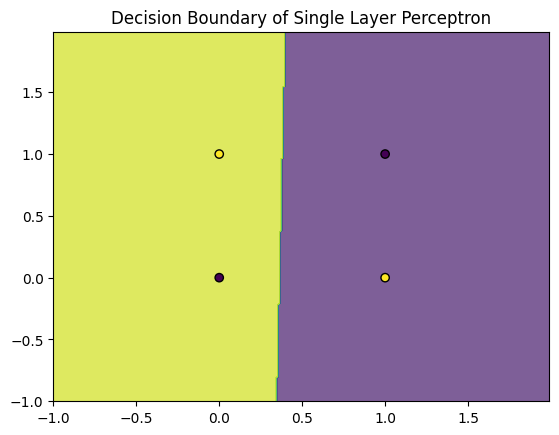

In [43]:
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict for the entire grid
    predictions = np.array([model.predict(point) for point in grid])
    predictions = predictions.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundary for Single Layer Perceptron
plot_decision_boundary(perceptron, X, "Decision Boundary of Single Layer Perceptron")


# Multi-Layer Perceptron Decision Boundary (Using PyTorch)

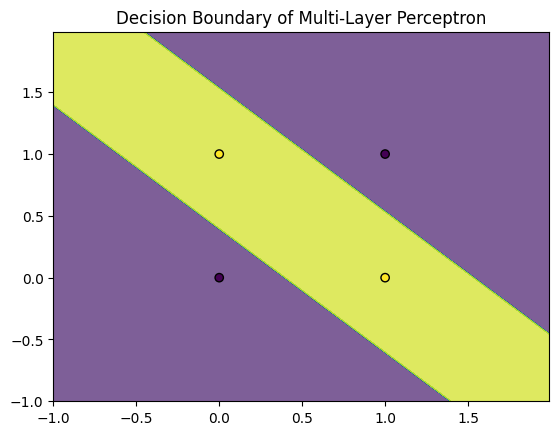

In [44]:
def plot_mlp_decision_boundary(model, X, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    
    # Predict for the entire grid using the MLP model
    with torch.no_grad():
        predictions = model(grid).numpy()
        predictions = (predictions > 0.5).astype(int)  # Convert probabilities to 0/1
    
    predictions = predictions.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.7)
    plt.scatter(X_tensor[:, 0], X_tensor[:, 1], c=y_tensor, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundary for MLP
plot_mlp_decision_boundary(mlp_model, X, "Decision Boundary of Multi-Layer Perceptron")


# Interpretation:
The decision boundary for the Single Layer Perceptron will not properly classify XOR since XOR is not linearly separable. The decision regions will be incorrect for some inputs.
The decision boundary for the Multi-Layer Perceptron should show proper separation, where the MLP creates non-linear boundaries that separate the XOR outputs correctly.

# Plotting Loss Over Time for MLP
Another useful visualization is the loss curve, which shows how the MLP model's loss decreases over training epochs.

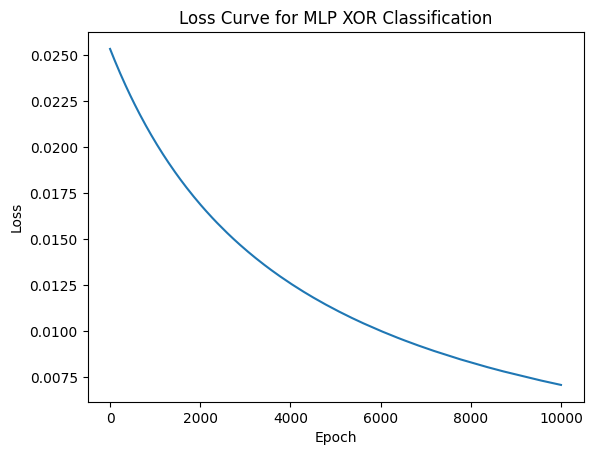

In [45]:
# Store loss over epochs
losses = []

# Training the MLP model with loss tracking
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = mlp_model(X_tensor)  # Forward pass
    loss = criterion(outputs, y_tensor)  # Compute the loss
    losses.append(loss.item())  # Save the loss value
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights

# Plot the loss over time
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for MLP XOR Classification')
plt.show()


# Interpretation:
This plot will show how the loss decreases as the MLP trains on the XOR dataset. A good model will show a steady decrease in loss, reaching near 0 as the model converges.

# Final Interpretation:
Single-Layer Perceptron: This model cannot classify XOR correctly because XOR is not linearly separable. The perceptron will give incorrect predictions for some inputs.

Multi-Layer Perceptron (MLP): By introducing hidden layers and non-linear activation functions (like Sigmoid), the MLP can learn the non-linear decision boundaries needed to classify XOR correctly. After sufficient training, the MLP will correctly classify XOR outputs.